# Linear Regression
This notebook will first build a linear regression model from scratch, then implement it with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset alongside the scikitlearn build-in function.

In [488]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [489]:
#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

Below is the code for a linear regression model, from scratch

In [490]:
#Create a function to find the slope of the regression line
def Slope(a,b):
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    slope = (n * dot_sum - sumX * sumY)/(n * sumX2 - sumX**2)
    return slope

In [491]:
#Create a function to find the intercept of the linear regression line
def Intercept(a,b):
    intercept = np.mean(b) - Slope(a,b) * np.mean(a)
    return intercept

In [492]:
#Create a function to make predictions using the linear regression algorithm
def Prediction(slope, x_input, intercept):
    predict = slope * x_input + intercept
    return predict

In [493]:
#Create a function to find R-squared, which is the regression metric
def R_squared(predicted_values, test_values):
    f = predicted_values
    y = test_values
    sum_sq = np.sum((y - np.mean(y))**2) #equation for sum of squares
    sum_reg = np.sum((f - np.mean(y))**2) #equation for regression sum
    sum_res = np.sum((y - f)**2) #equation for residuals sum of squares
    R_2 = 1 - (sum_res/sum_sq) #equation for R-squared
    return R_2    

In [494]:
#Create a function to find the correlation coefficient for given x and y values
def Correlation_coeff(predicted_values, test_values):
    a = predicted_values
    b = test_values
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    sumY2 = np.sum(b**2)
    score = (n *dot_sum - sumX * sumY) / np.sqrt((n * sumX2 - (sumX)**2)*(n * sumY2 - (sumY)**2))
    return score

In [495]:
#Create a function to find the covariance for given x and y values
def Covariance(X,Y):
    a = X
    b = Y
    n = len(a)
    dot_sum = np.sum(a*b)
    cov = dot_sum / n - np.mean(a) * np.mean(b)
    return cov

## Pre-Processing
Before we can run linear regression, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [496]:
#Setting which variables will be compared in the regression
X = encoded_df['Age']
y = encoded_df['MonthlyIncome']

In [497]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

# Implementation
We will now utilize the functions created above to evaluate the imported dataset For [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) specifically, there are lots of variables on which one could run a regression.

In [498]:
#Divide the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [499]:
#Find the intercept of the training regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))

R-squared: 0.2388098710560962
Correlation Coefficient: 0.49228484344141066


In [505]:
#Equation of the regression line
y_est = slope * X + intercept

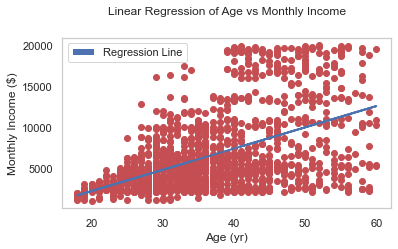

In [511]:
#Plot the linear regression function
plt.scatter(X,y, c='r')
plt.plot(X,y_est, color = 'b',linewidth=2)
blue_patch = mpatches.Patch(label='Regression Line')
plt.legend(loc=0,handles=[blue_patch])
plt.title('Linear Regression of Age vs Monthly Income', y=1.1)
plt.ylabel('Monthly Income ($)')
plt.xlabel('Age (yr)')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

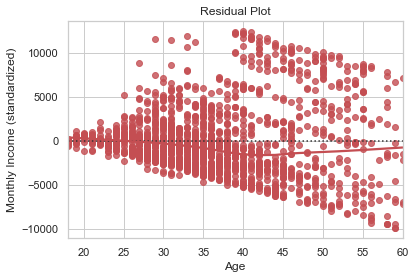

In [512]:
#Residual plot
sns.set(style="whitegrid")
sns.residplot(X, y, lowess=True, color="r")
plt.title('Residual Plot')
plt.ylabel('Monthly Income (standardized)')
plt.xlabel('Age')
plt.show()